In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data-export (1).csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Cleaning data for retrieve important insight from this 

In [2]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ['channel group', 'Date', 'Users', 'Sessions', 'Engaged sessions', 'Average engagement time per session', 'Engaged sessions per user','Event per session', 'Engagement rate', 'Event count']

In [3]:
df.head()

,channel group,Date,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Event per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   Date                                 3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Event per session                    3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


# Change the data types of the data 

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H', errors='coerce')
df['Hours'] = df['Date'].dt.hour
numeric_col = df.columns.drop('channel group', 'Date')
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date                                 3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Event per session                    3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hours       

In [7]:
df.head()

,channel group,Date,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Event per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [8]:
df.describe()

,Date,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Event per session,Engagement rate,Event count,Hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [9]:
sns.set(style='whitegrid')
sns.set(palette='viridis')

# What patterns or trends can you observe in website sessions and users over time?

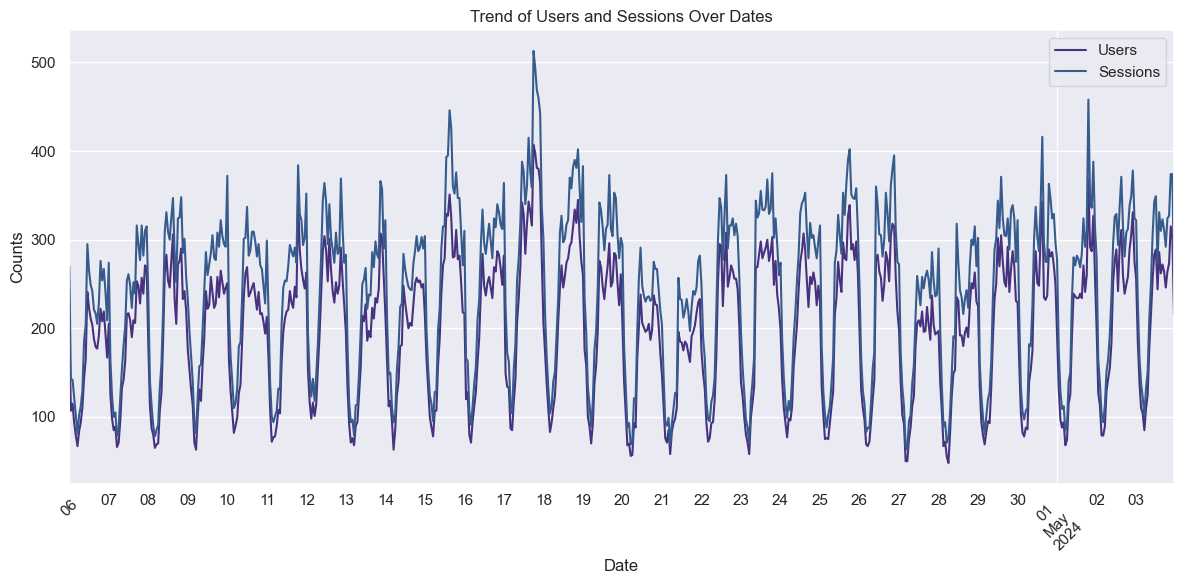

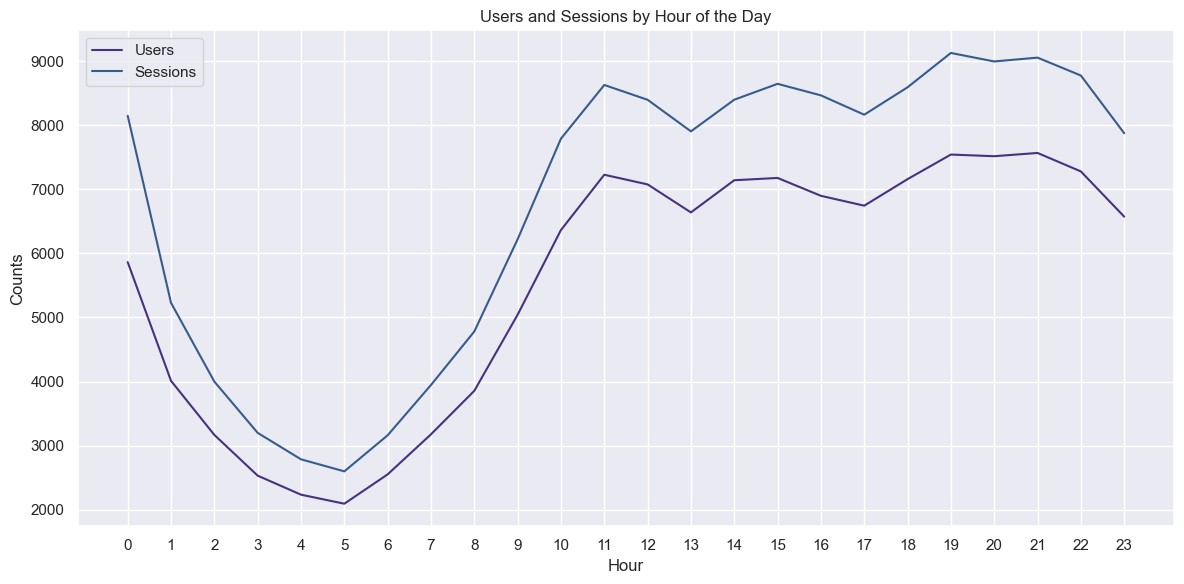

In [19]:
# pattern/Trend find on website sessions and user over time 
# Plot 1: Users and Sessions by Dates
plt.figure(figsize=(12, 6))
df.groupby('Date')[['Users', 'Sessions']].sum().plot(ax=plt.gca())
plt.title('Trend of Users and Sessions Over Dates')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Users and Sessions by Hours
plt.figure(figsize=(12, 6))
df.groupby('Hours')[['Users', 'Sessions']].sum().plot(ax=plt.gca())
plt.title('Users and Sessions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

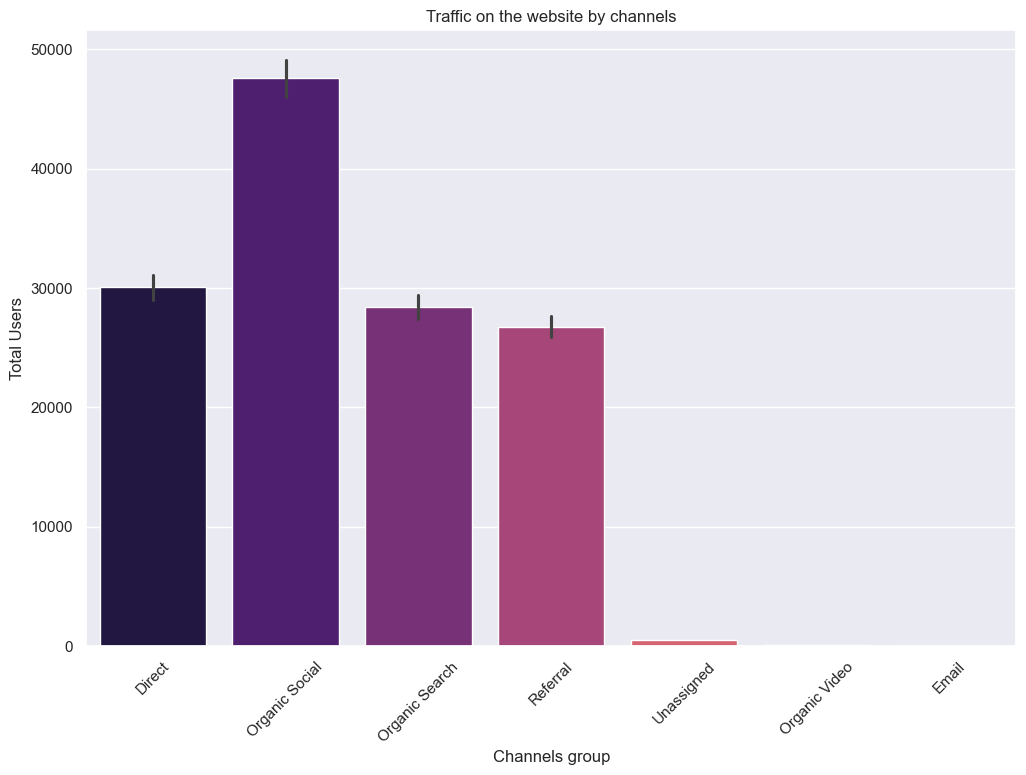

In [11]:
# Traffic of the users on the website by the channels group
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='channel group', y='Users', estimator=np.sum, palette='magma', hue='channel group', legend=False)
plt.title('Traffic on the website by channels')
plt.xlabel('Channels group')
plt.ylabel('Total Users')
plt.xticks(rotation=45)
plt.show()

# Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

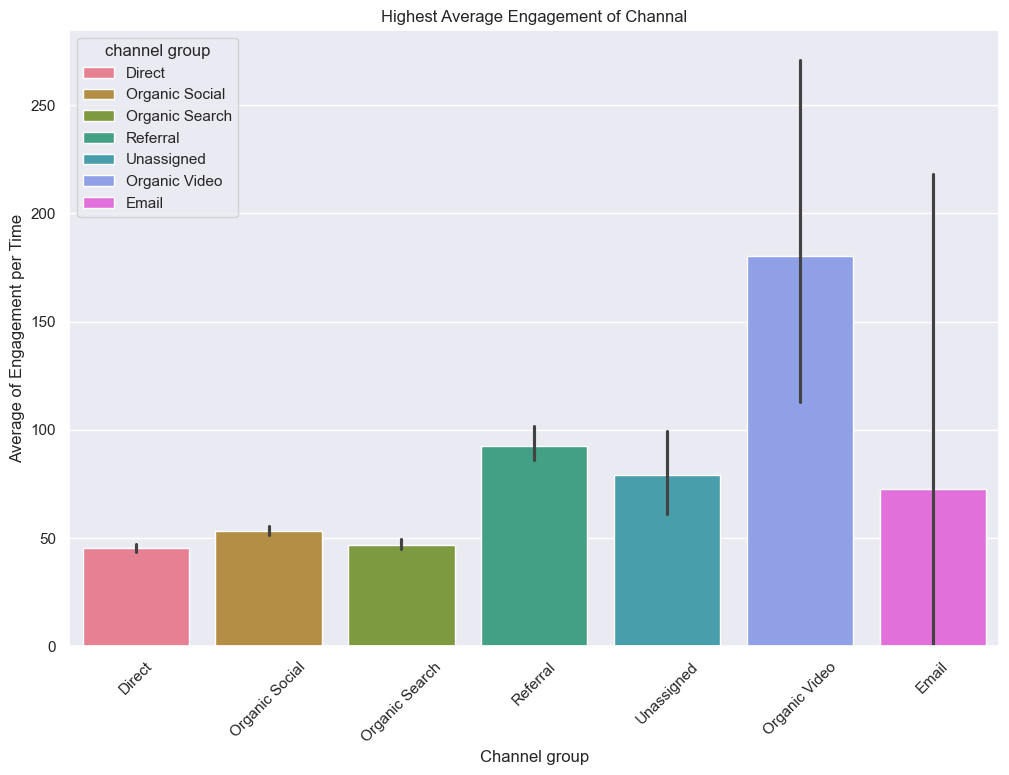

In [12]:
# Which channels have the highest average engagement 
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='channel group', y='Average engagement time per session', hue='channel group',estimator=np.mean, legend=True)
plt.title('Highest Average Engagement of Channal')
plt.xlabel('Channel group')
plt.ylabel('Average of Engagement per Time')
plt.xticks(rotation=45)
plt.show()

# How does engagement rate vary across different traffic channels?

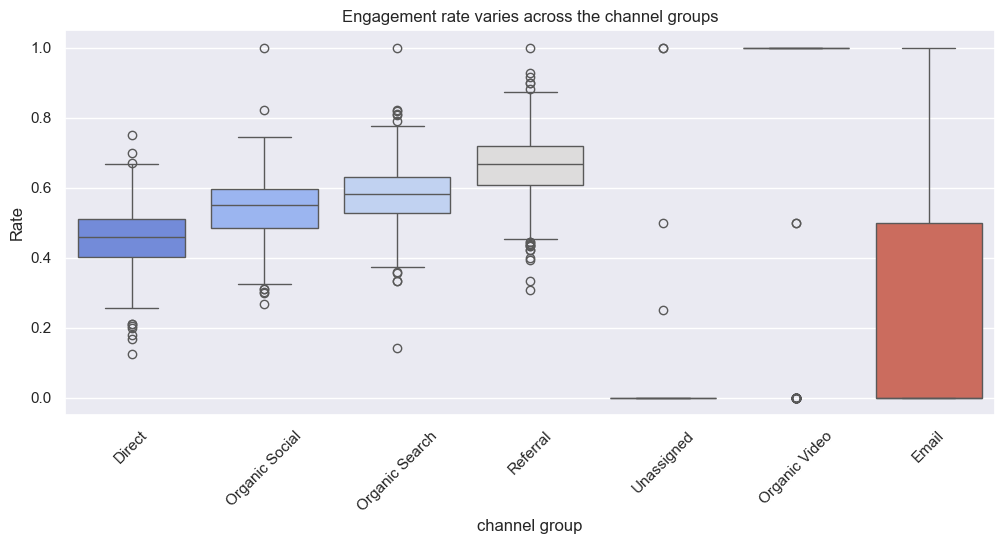

In [21]:
# Engagement rate varies across the Channel groups
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='channel group', y='Engagement rate', hue='channel group', palette='coolwarm', legend=False)
plt.title('Engagement rate varies across the channel groups')
plt.xlabel('channel group')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.show()

# Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

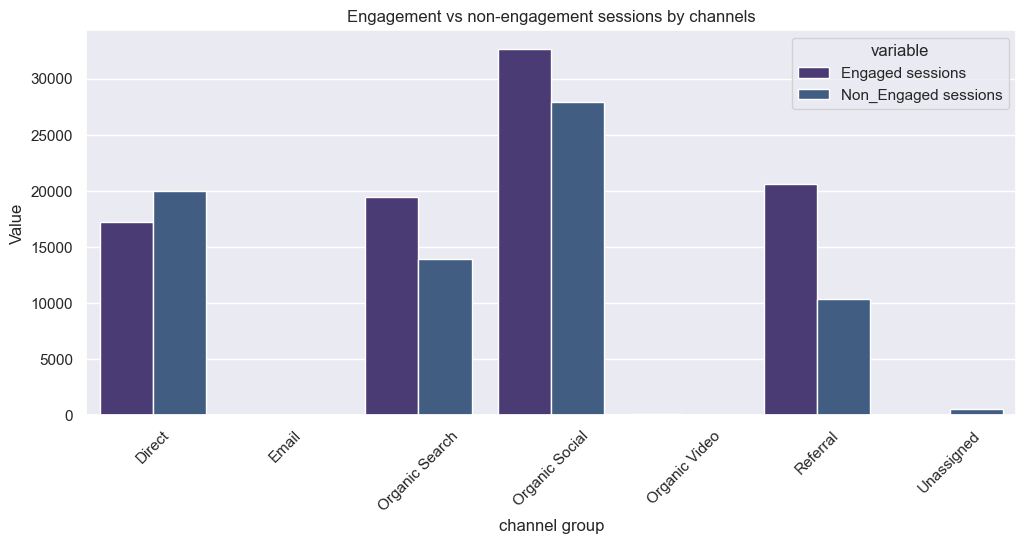

In [22]:
# Engagement vs non-engagement users come across which channel group
session_df = df.groupby('channel group')[['Sessions','Engaged sessions']].sum().reset_index()
session_df['Non_Engaged sessions'] = session_df['Sessions']-session_df['Engaged sessions']
sessions_df_melted = session_df.melt(id_vars=['channel group'], value_vars=['Engaged sessions', 'Non_Engaged sessions'])
plt.figure(figsize=(12,5))
sns.barplot(data=sessions_df_melted, x='channel group', y='value', hue='variable', legend=True)
plt.title('Engagement vs non-engagement sessions by channels')
plt.xlabel('channel group')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# At what hours of the day does each channel drive the most traffic?

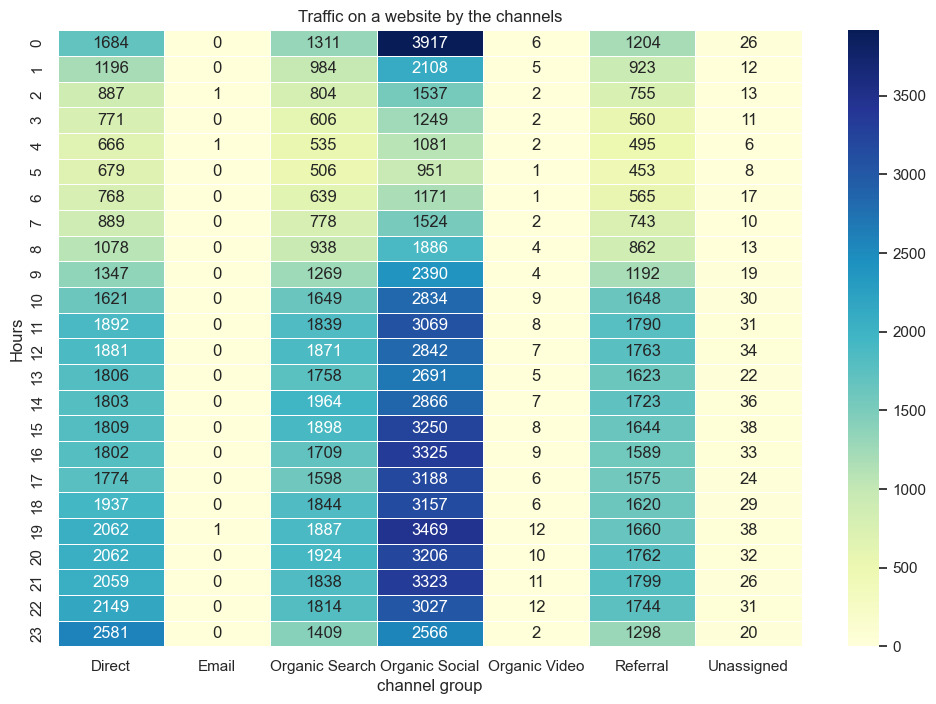

In [24]:

Traffic_ = df.groupby(['Hours', 'channel group'])['Sessions'].sum().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(Traffic_ , cmap="YlGnBu", linewidths = .5, annot = True, fmt = '.0f')
plt.title('Traffic on a website by the channels')
plt.show()

# Is there any correlation between high traffic (sessions) and high engagement rate over time?

Correlation between Sessions and engagement Rate: 0.08344754002348544


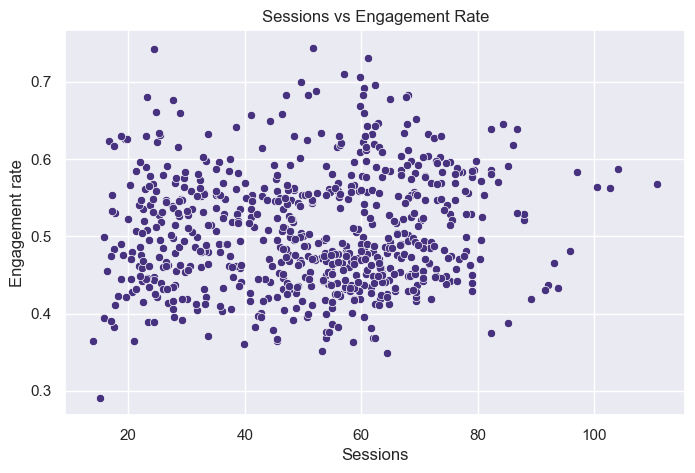

In [17]:
df_plot = df.groupby('Date')[['Sessions', 'Engagement rate']].mean().reset_index()
correlation = df_plot['Sessions'].corr(df_plot['Engagement rate'])
print('Correlation between Sessions and engagement Rate:',correlation)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_plot, x="Sessions", y='Engagement rate')
plt.title('Sessions vs Engagement Rate')
plt.show()

&#9679; Correlation Analysis:
        A correlation analysis was conducted between daily sessions and engagement rate over the observed time period. The resulting Pearson correlation coefficient was 0.08, indicating a very weak positive relationship.

&#9679; Key Insight:
        This suggests that there is no meaningful correlation between the volume of traffic and user engagement rate. Therefore, higher traffic does not guarantee higher engagement. User engagement appears to be influenced by other factors such as content quality, user experience, or marketing channel relevance rather than the traffic volume alone.

&#9679; Recommendation:
        To improve engagement, focus should be placed on optimizing content, improving UX, and targeting high-intent audiences, rather than solely increasing session volume.

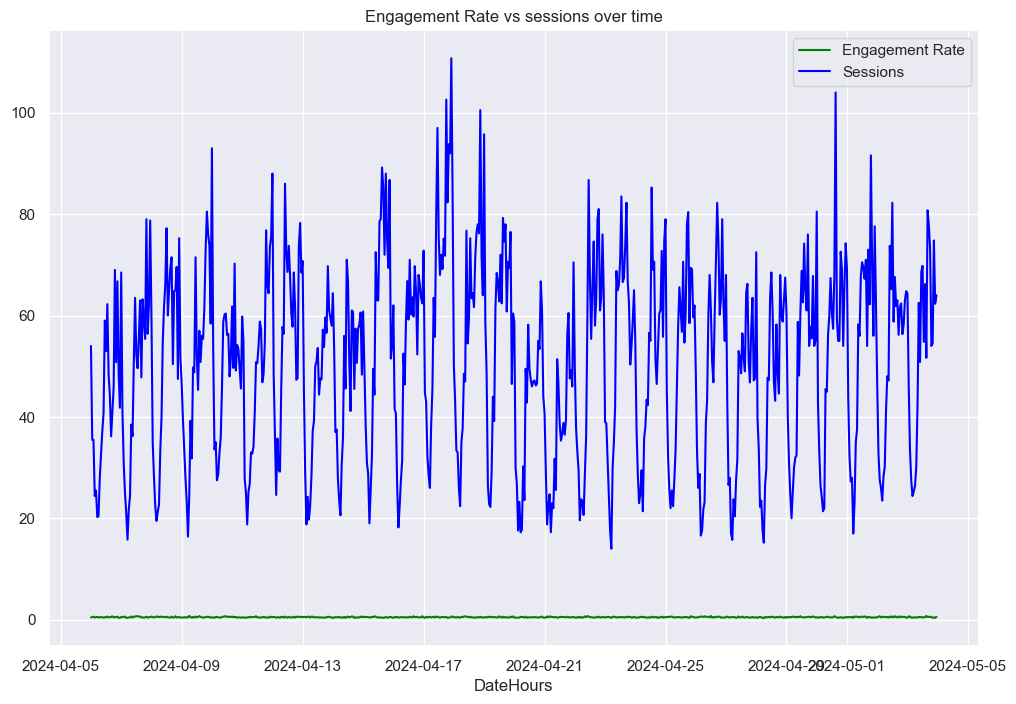

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df_plot['Date'],df_plot['Engagement rate'],  label='Engagement Rate', color='green')
plt.plot(df_plot['Date'], df_plot['Sessions'], label='Sessions', color='blue')
plt.title('Engagement Rate vs sessions over time')
plt.xlabel('DateHours')
plt.legend()
plt.show()

📌 Summary of Insights
1.  Insights from Website Traffic Analysis<br>
&#9670; Date-wise Trend:<br>
- Upon analyzing the sessions and users by date, the **highest traffic was observed between the dates 15th to 19th**.<br>
- This period consistently showed **elevated user activity**, suggesting a likely event, promotion, or regular weekly pattern.<br>
&#9670; Hour-wise Trend:<br>
- When analyzing by hour, the **peak sessions occurred around 19:00 (7 PM)**.<br>
- This suggests that users are **most active during the evening hours**, possibly after work hours.<br>
&#9670; Business Implications:<br>
- For maximum reach and engagement, campaigns or content releases could be **timed between the 15th and 19th of each month** and scheduled for the **evening hours around 7 PM**.<br>

2. Marketing Channel Performance Analysis<br>
◆ Top Performing Channel:<br>
- **Organic Social** generated the **highest number of users**, indicating strong performance through unpaid social media activities such as posts, shares, and community engagement.<br>
- This shows that organic social efforts are effectively reaching and engaging the target audience.<br>
◆ Underperforming Channels:<br>
- Channels like **Email** and **Organic Video** reported **zero user traffic** during the analyzed period.<br>
- This suggests either:<br>
  - These channels are **inactive or not being utilized**, or<br>
  - Current campaigns under these channels are **not reaching or engaging users**.<br>
◆  Actionable Insights:<br>
- **Replicate successful strategies** from Organic Social (e.g., regular posting, user-focused content, engagement) in other channels.<br>
- For **Email**:<br>
  - Ensure email campaigns are active and well-targeted.<br>
  - Audit mailing lists and delivery performance.<br>
- For **Organic Video**:<br>
  - Assess if video content is being published and properly distributed (YouTube, Reels, Shorts).<br>
  - Improve visibility through SEO and social sharing.<br>
◆ Recommendation:<br>
- Continue investing in **Organic Social** while developing a strategic plan to activate and improve the performance of **Email** and **Organic Video** as additional growth channels.<br>


3. Engagement Time Insight<br>
- **Organic Video** had the **highest average engagement time**, peaking over **250 seconds**, indicating strong content effectiveness and deep user interest.<br>
- **Email** also showed a high tail (200+), but most users dropped off before 100 seconds.<br>
- Other channels like **Direct**, **Organic Search**, and **Social** showed lower engagement (under 60 seconds), suggesting less engaging or intent-driven sessions.<br>
◆ Recommendation:<br>
- Invest more in **video content** and **optimize email follow-ups** to retain attention.<br>
- Reassess content strategy for underperforming channels like Direct and Social.<br>


4. Engagement Rate by Channel Group<br>
- **Referral**, **Organic Search**, and **Organic Social** show **higher median engagement rates**.<br>
- **Direct** has a moderate median but more spread, indicating mixed engagement.<br>
- **Email** and **Organic Video** show **extremely wide variation**, suggesting inconsistent performance.<br>
- **Unassigned** has the **lowest engagement rate**, often near zero.<br>
◆  Recommendation:<br>
Focus on optimizing **Email** and **Organic Video** for consistency, and consider improving **Unassigned** traffic quality.<br>


5. Engaged vs Non-Engaged Sessions by Channel<br>
- **Organic Social**, **Referral**, and **Organic Search** have more **engaged sessions than non-engaged**, showing strong user interaction from these sources.<br>
- **Direct** has more **non-engaged sessions**, suggesting low intent or weak landing experiences.<br>
- **Email** and **Organic Video** show **no engagement**, indicating either inactive campaigns or ineffective content.<br>
◆ Recommendation:<br>
- Focus on enhancing content for **Direct** and activating campaigns for **Email** and **Organic Video**.<br>
- Continue leveraging high-performing channels like **Organic Social** and **Referral** for quality traffic.<br>


6. Peak Traffic Hours by Channel<br>
- **Organic Social** drives the **highest traffic overall**, peaking at **3,917 sessions at 0:00 hours (midnight)**.<br>
- Other channels like **Direct**, **Referral**, and **Organic Search** also show consistent activity between **18:00 to 22:00 hours**.<br>
- **Email** and **Organic Video** show **no traffic across all hours**.<br>
◆ Recommendation:<br>
- Schedule key content and campaigns on **Organic Social around midnight** and **evenings (6–10 PM)** for maximum reach.<br>
- Activate and test **Email** and **Video** campaigns to evaluate potential contribution.<br>
